In [1]:
import pandas as pd
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt
import numpy as np

In [60]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
urldeath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
urlRecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [61]:
dataDF = pd.read_csv(url)

In [62]:
dataDF.head(n=30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,50,83,93,99,117,129,149,149,197
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,12,13,21,21,27,32,32,39,46,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,22,26,28,38,48,55,65,65,92
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,10,10,10,11,11,15,18,21,21,36
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,11,13,13,13,15,15,18,20,20,35
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,1,2,2,2,3,3,5


In [63]:
dataDF.loc[dataDF['Country/Region']=='Italy',['3/12/20']] = 15113
dataDF.loc[dataDF['Country/Region']=='Switzerland',['3/12/20']] = 815
dataDF.loc[dataDF['Country/Region']=='France',['3/12/20']] = 2876
dataDF.loc[dataDF['Country/Region']=='Spain',['3/12/20']] = 2950
dataDF.loc[dataDF['Country/Region']=='Netherlands',['3/12/20']] = 614
dataDF.loc[dataDF['Country/Region']=='UK',['3/12/20']] = 590
dataDF.loc[dataDF['Country/Region']=='Belgium',['3/12/20']] = 399
dataDF.loc[dataDF['Country/Region']=='Greece',['3/12/20']] = 117




In [59]:
dataDF.head(n=10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,50,83,93,99,117,129,149,149,197
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,12,13,21,21,27,32,32,39,46,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,22,26,28,38,48,55,65,65,92
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,10,10,10,11,11,15,18,21,21,36
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,11,13,13,13,15,15,18,20,20,35
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,1,2,2,2,3,3,5


In [6]:
dataDF[dataDF['Country/Region']=='Republic of Korea'] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20


In [7]:
startDate=date(2020,1,22)

In [8]:
lenDates = len(dataDF.columns.values)-4

In [9]:
dataDF.columns.values

array(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20'], dtype=object)

In [10]:
allDates=[startDate + timedelta(days=i) for i in range(lenDates)]

In [11]:
Europe = ['France','Germany','Italy','UK','Spain','Belgium','Netherlands','Sweden','Denmark','Portugal','Austria',\
          'Poland','Finland','Norway','Croatia','Greece','San Marino','Iceland','Czech Republic','Slovenia','Ireland','Romania',\
         'Estonia','Hungary','Slovakia','Latvia','Luxembourg', 'Bosnia and Herzegovina','Monaco', 'Vatican City','Liechtenstein' ]


In [12]:
def GetDataFor(Country,dataDF):
    startDate=date(2020,1,22)
    if Country=='Europe':
        EuropeDf = dataDF.loc[dataDF['Country/Region'].isin(Europe)]
        EuropeDf.fillna(0, inplace=True)
        vals = EuropeDf.sum(axis=0)
        #vals = vals.values
        i_ = 4 if isinstance(vals[0], str) else 3 if isinstance(vals[1],str) else 2
        vals =vals[i_:].values
    else:
        dataDF2 = dataDF[(dataDF['Country/Region'].str.contains(Country)) | (dataDF['Province/State'].str.contains(Country))]
        if dataDF2.shape[0]>1:
            dataDF2.fillna(0, inplace=True)
            vals = dataDF2.sum(axis=0)
            #print(vals)
            #vals = vals.values
            i_ = 4 if isinstance(vals[1], str) else 3 if isinstance(vals[1], str) else 2
            vals =vals[i_:].values
        else:
            dataDF2 = dataDF2.dropna(axis='columns')
            vals = dataDF2.values
            #print(vals)
            i_ = 3 if isinstance(vals[0][0], str) else 2
            vals=vals[0][i_:]

    allDates=[startDate + timedelta(days = i) for i in range(len(vals))] 
    return vals,allDates

In [13]:
EuropeDf = dataDF.loc[dataDF['Country/Region'].isin(Europe)]
#EuropeDf.fillna(0, inplace=True)
#EuropeDf.head()
#vals = EuropeDf.sum(axis=0)

In [14]:
EuropeDf = dataDF.loc[dataDF['Country/Region'].isin(Europe)]

EuropeDf.head(n=100)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,262,482,670,799,1040,1176,1457,1908,2078,3675
12,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,...,6,12,15,15,23,30,40,59,59,155
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660
17,NaN,Sweden,63.0000,16.0000,0,0,0,0,0,0,...,35,94,101,161,203,248,355,500,599,814
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,222,259,400,500,673,1073,1695,2277,2950,5232
20,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,23,50,109,169,200,239,267,314,399,559
30,NaN,Croatia,45.1000,15.2000,0,0,0,0,0,0,...,10,10,11,12,12,12,14,19,19,32
32,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,29,41,55,79,104,131,182,246,302,504
37,NaN,Greece,39.0742,21.8243,0,0,0,0,0,0,...,9,31,45,46,73,73,89,99,117,190
39,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,56,87,108,147,176,205,400,598,702,996


Test:

In [15]:
v,d = GetDataFor('Europe',dataDF)
print(v)
print(d[-1])
print(v.shape)
print(len(d))

[0.0000e+00 0.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00 4.0000e+00
 8.0000e+00 1.0000e+01 1.0000e+01 1.4000e+01 1.9000e+01 2.1000e+01
 2.3000e+01 2.4000e+01 2.4000e+01 2.4000e+01 2.6000e+01 3.1000e+01
 3.3000e+01 3.3000e+01 3.5000e+01 3.5000e+01 3.5000e+01 3.5000e+01
 3.6000e+01 3.6000e+01 3.6000e+01 3.6000e+01 3.6000e+01 3.6000e+01
 5.3000e+01 9.5000e+01 1.8800e+02 2.6200e+02 3.6500e+02 5.2400e+02
 7.7900e+02 1.0610e+03 1.4200e+03 2.1320e+03 2.6380e+03 3.2390e+03
 4.1440e+03 5.4860e+03 7.0940e+03 9.1300e+03 1.1517e+04 1.4212e+04
 1.7402e+04 2.2160e+04 3.5622e+04 3.6003e+04]
2020-03-13
(52,)
52


/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [16]:
print(d)

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [17]:
def CutData(vals, allDates,thresh):
    idx = next((i for i, x in enumerate(vals) if x>thresh), None)
    #idx = idx -1 if idx>0 else 0
    vals = vals[idx:]
    allDates = allDates[idx:]
    return vals, allDates

# Italy plotting

In [18]:
Country='Italy'

In [19]:
vals,allDates = GetDataFor(Country,dataDF)

Custom Add latest data

In [20]:
vals = np.append(vals,9172)
allDates.append(date(2020,3,9))

In [21]:
valsIt, allDatesIt = CutData(vals,allDates,200)

In [22]:
alldaysIt = range(len(allDatesIt))

/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


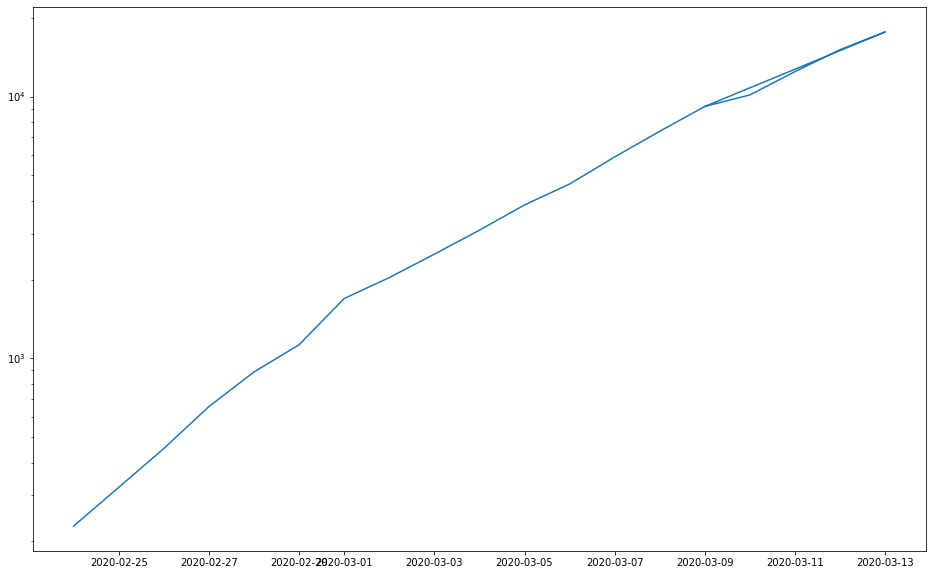

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(allDatesIt,valsIt)
plt.yscale('log')

## Fit Linear regression

In [24]:
import sklearn.linear_model
import numpy as np

In [25]:
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

In [26]:
valsItLog = [np.log(valsIt_) for valsIt_ in valsIt]

In [27]:
x = np.c_[alldaysIt]
y = np.c_[valsItLog]

In [28]:
y

array([[5.433722  ],
       [5.77455155],
       [6.11589213],
       [6.48463524],
       [6.78897174],
       [7.02820143],
       [7.43484788],
       [7.61874238],
       [7.82484569],
       [8.03560269],
       [8.25790419],
       [8.4416072 ],
       [8.67982211],
       [8.90585118],
       [9.12391064],
       [9.22513046],
       [9.43043929],
       [9.62331058],
       [9.77905747],
       [9.12391064]])

In [29]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plot prediction

In [30]:
LengthPred = 40

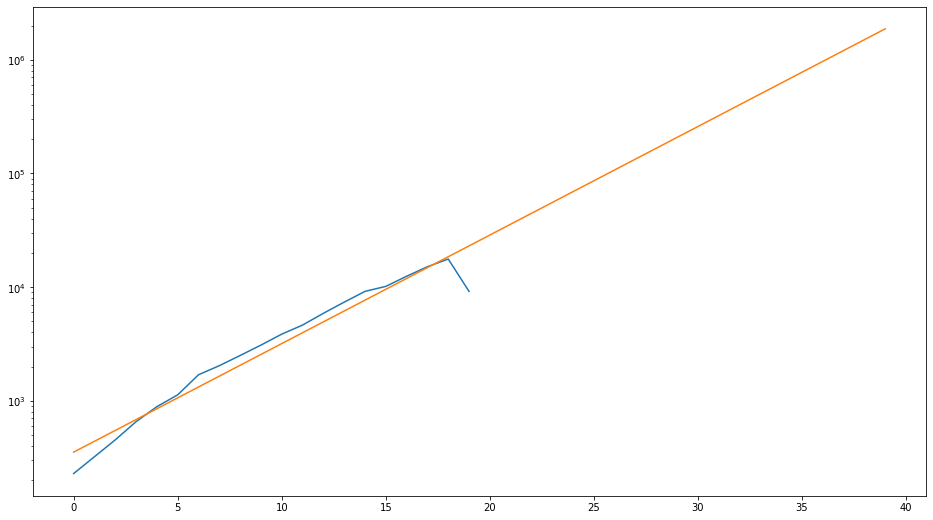

In [31]:
start = np.round(-model.intercept_[0]/model.coef_[0])
X_new = np.c_[np.arange(start,LengthPred)]
X_new = np.c_[np.arange(0,LengthPred)]
pred = model.predict(X_new)
y_new = [np.exp(val[0]) for val in pred]
Y_new = np.c_[y_new]

fig,ax = plt.subplots(figsize=(16,9))
ax.plot(alldaysIt,valsIt)

ax.plot(X_new,Y_new)
plt.yscale('log')

In [32]:
model.intercept_

array([5.8677546])

In [33]:
model.coef_

array([[0.21987297]])

In [34]:
print(start)

[-27.]


In [35]:
startFitDay = allDatesIt[0]

In [36]:
print(type(startFitDay))

<class 'datetime.date'>


In [37]:
allDatesPred = [startFitDay + timedelta(days=i) for i in range(LengthPred)]

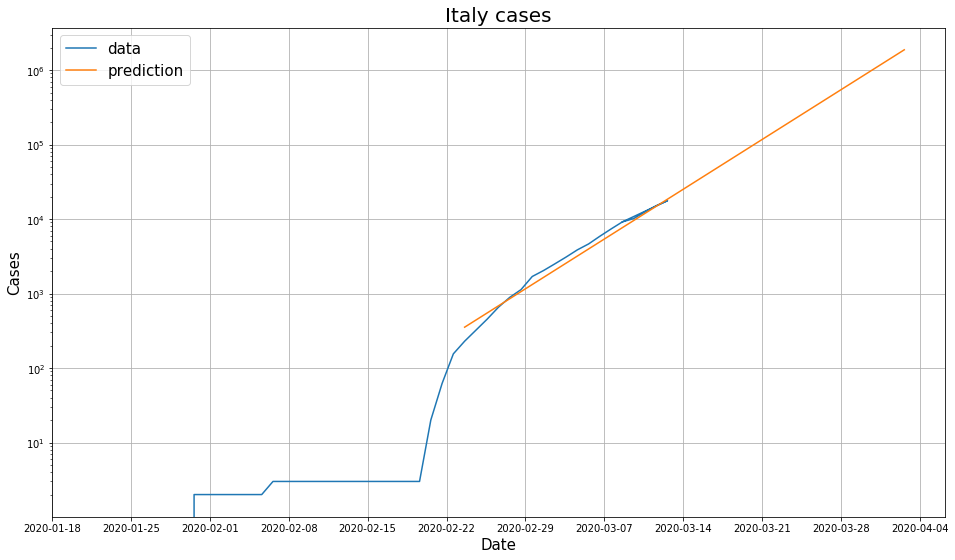

In [38]:
fig,ax = plt.subplots(figsize=(16,9))
ax.plot(allDates,vals, label = 'data')
ax.plot(allDatesPred,Y_new, label = 'prediction')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 7))
plt.yscale('log')
plt.title(Country + ' cases', fontSize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Cases',fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.grid(True)
plt.show()

In [39]:
    #Create model
    #model = sklearn.linear_model.LinearRegression(fit_intercept=True)

    #Convert data
    #valsCtLog = [np.log(valsCt_) for valsCt_ in valsCt]
    #y = np.c_[valsCtLog]
    
    #Create x-axis
    #alldaysCt = range(len(allDatesCt))
    #x = np.c_[alldaysCt]

    #Fit data
    #model.fit(x,y)

    #Predict data
    #X_new = np.c_[np.arange(0,len(x) + lengthPred)]
    #pred = model.predict(X_new)
    #y_new = [np.exp(val[0]) for val in pred]
    #Y_new = np.c_[y_new]

    #Generate X axis
    #startFitDay = allDatesCt[0]
    #allDatesPred = [startFitDay + timedelta(days=i) for i in range(len(x) + lengthPred)]
    
    #PlotData



# Create Fun

In [40]:
def MakePrediction(valsCt,allDatesCt,lengthPred):
    #Create model
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)

    #Convert data
    valsCtLog = [np.log(valsCt_) for valsCt_ in valsCt]
    y = np.c_[valsCtLog]
    
    #Create x-axis
    alldaysCt = range(len(allDatesCt))
    x = np.c_[alldaysCt]

    #Fit data
    model.fit(x,y)

    #Predict data
    X_new = np.c_[np.arange(0,len(x) + lengthPred)]
    pred = model.predict(X_new)
    y_new = [np.exp(val[0]) for val in pred]
    Y_new = np.c_[y_new]

    #Generate X axis
    startFitDay = allDatesCt[0]
    allDatesPred = [startFitDay + timedelta(days=i) for i in range(len(x) + lengthPred)]

    return allDatesPred,Y_new

In [41]:

def PlotPrediction(Country,Threshold,lengthPred):
    #Get data
    vals,allDates = GetDataFor(Country,dataDF)
    
    valsCt, allDatesCt = CutData(vals,allDates,Threshold)

    fig,ax = plt.subplots(figsize=(16,9))
    
    ax.plot(allDates[13:],vals[13:], 's',marker='o',label = 'data')
    
    allDatesPred, Y_new = MakePrediction(valsCt[:10],allDatesCt[:10],len(valsCt)-10+lengthPred)
    
    ax.plot(allDatesPred,Y_new, '--',color='black',label = 'Exponential fit -  begin')
    
    allDatesPred, Y_new = MakePrediction(valsCt[-9:],allDatesCt[-9:],lengthPred+1)
    
    ax.plot(allDatesPred,Y_new, '-.',color='black',label = 'Exponential fit -  end')
    
    #Set x axis
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 4))
    
    #set yscale
    plt.yscale('log')
    
    #labels
    plt.title(Country + ' cases', fontSize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Cases',fontsize=15)
    plt.legend(loc="upper left",fontsize=15)
    
    plt.grid(linestyle='-.', linewidth='0.5', color='gray')
    
    plt.grid(True)
    plt.show()

/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


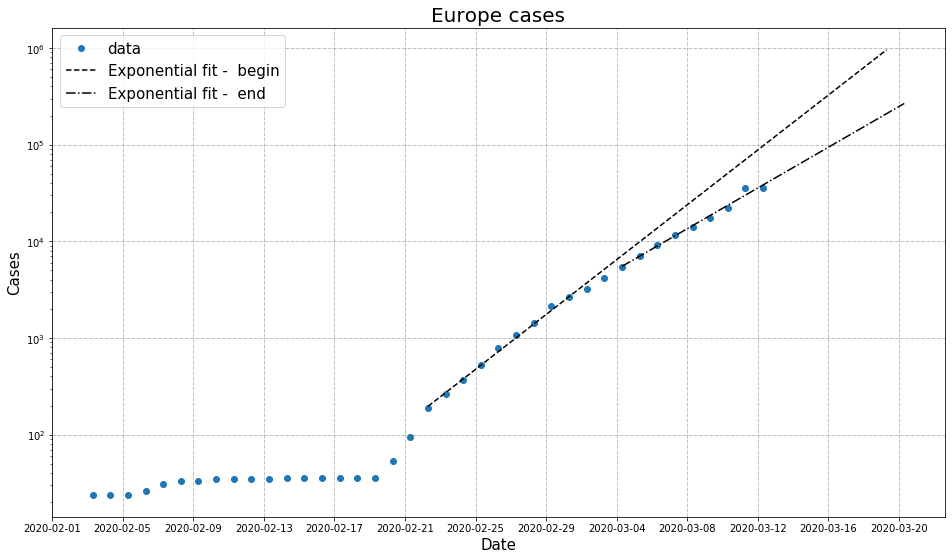

In [42]:
PlotPrediction('Europe',100,7)

De exponentiële groei van de eerste 10 dagen is hoger dan die van de laatste 10. Dat betekent dat er of veel gevallen gemist worden door verminderd testen of dat de groei al vertraagd is. In het eerste geval zitten we al aan 100 000 cases. In het tweede geval zitten we daar maandag aan...

## Overlay outbreaks

In [43]:
Countries=['Hubei','South Korea','Italy','Iran (Islamic Republic of)','France','Germany','UK','US',]

In [44]:
Countries=['Hubei','Republic of Korea','Italy','Iran (Islamic Republic of)','France','Switzerland','Netherlands','Belgium']
Countries=['Hubei','Republic of Korea','Italy','Iran (Islamic Republic of)','France','Switzerland','Netherlands','US']
Countries=['Mainland China','Republic of Korea','Italy','France','Switzerland','Netherlands','US']

In [45]:
Countries=['Mainland China','South Korea','Italy','Iran (Islamic Republic of)','France','Germany','UK','US',]

In [46]:
Countries=['Korea','Italy','Iran','France','Germany','UK','US','Switzerland','Netherlands','Belgium']

In [47]:
Countries=['Korea','Italy','France','Germany','Switzerland','Netherlands','Belgium']

Korea30
[31 31 104 204 433 602 833 977 1261 1766 2337 3150 3736 4335 5186 5621
 6088 6593 7041 7314 7478 7513 7755 7869 7979]
Italy30
[62 155 229 322 453 655 888 1128 1694 2036 2502 3089 3858 4636 5883 7375
 9172 10149 12462 15113 17660]
France30
[38 57 100 130 191 204 288 380 656 952 1129 1212 1787 2284 11504 3667]
Germany30
[46 48 79 130 159 196 262 482 670 799 1040 1176 1457 1908 2078 3675]
Switzerland30
[42 56 90 114 214 268 337 374 491 652 815 1139]
Netherlands30
[38 82 128 188 265 321 382 503 614 804]
Belgium30
[50 109 169 200 239 267 314 399 559]


/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


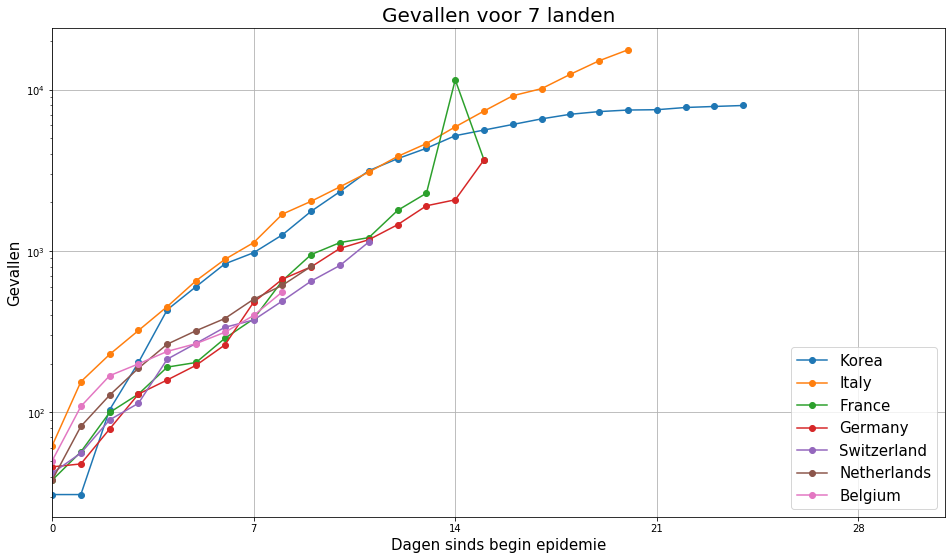

In [48]:
Thresholds=[10,30,3,15,20,20,14,100,100]

#Create figure
fig,ax = plt.subplots(figsize=(16,9))

i=0
#Loop over countries
for Country,Threshold in zip(Countries,Thresholds):
    Threshold=30

    print(Country + str(Threshold))
    vals,allDates = GetDataFor(Country,dataDF)
    
    valsCt, allDatesCt = CutData(vals,allDates,Threshold)
    
    #valsCt, allDatesCt = ExpoFit(vals,allDates)
    print(valsCt)
    
    alldaysCt = range(len(allDatesCt))
    if Country=='Mainland China' or Country == 'Hubei':
        alldaysCt = [alldaysCt_ + 4 for alldaysCt_ in alldaysCt]
    elif Country=='Republic of Korea':
        #valsCt=valsCt[1:]
        alldaysCt = range(len(allDatesCt)-0)
    elif Country=='US':
        valsCt=valsCt[2:]
        alldaysCt = range(len(allDatesCt)-2)



    ax.plot(alldaysCt,valsCt, marker='o',label = Country)
    i+=1

timeline=31

ax.xaxis.set_ticks(np.arange(0, timeline, 7))
ax.set_xlim([0,timeline])    
    
#set yscale
plt.yscale('log')

#labels
plt.title('Gevallen voor ' +str(i) + ' landen'  , fontSize=20)
plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
plt.ylabel('Gevallen',fontsize=15)
plt.legend(loc="lower right",fontsize=15)
plt.grid(True)
plt.show()

## Fitting line and cutting at 0

In [49]:
def ExpoFit(vals,allDates):
    
    valsCt, allDatesCt = CutData(vals,allDates,100)
    cutsize = len(vals)- len(valsCt)
    
    valsCt = valsCt[:10] if len(valsCt)>10 else valsCt
    #Create model
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)
    
    #Convert data
    valsCtLog = [np.log(valsCt_) for valsCt_ in valsCt]
    y = np.c_[valsCtLog]
    
    #Create x-axis
    alldaysCt = range(len(valsCtLog))
    x = np.c_[alldaysCt]
    #Fit data
    model.fit(x,y)
    
    start = np.round((model.intercept_[0]-2)/model.coef_[0])
    
    si_ = 0 if start>cutsize else int(cutsize-start)
    
    return vals[si_:],allDates[si_:]



In [50]:
Countries=['China','Hubei','Washington','Korea','Italy','Iran','France','Germany','Switzerland','Netherlands','US']

In [51]:
def CreateAlignedFigure(Countries):
    #Create figure
    fig,ax = plt.subplots(figsize=(16,9))

    i=0
    #Loop over countries
    for Country in Countries:
        print(Country)
        #Theshold=10
        vals,allDates = GetDataFor(Country,dataDF)

        #valsCt, allDatesCt = CutData(vals,allDates,Threshold)

        valsCt, allDatesCt = ExpoFit(vals,allDates)
        #print(valsCt)

        alldaysCt = range(len(allDatesCt))
        if 'China' in Country or 'Hubei' in Country:
            alldaysCt = [alldaysCt_ + 10 for alldaysCt_ in alldaysCt]
        #elif Country=='Republic of Korea':
            #valsCt=valsCt[1:]
        #    alldaysCt = range(len(allDatesCt)-0)
        #elif Country=='US':
        #    valsCt=valsCt[2:]
        #    alldaysCt = range(len(allDatesCt)-2)


        
        ax.plot(alldaysCt,valsCt, marker='o',label = Country)
        i+=1

    timeline=31+7

    ax.xaxis.set_ticks(np.arange(0, timeline, 7))
    ax.set_xlim([7,timeline])    

    #set yscale
    plt.yscale('log')

    #labels
    plt.title('Gevallen voor ' +str(i) + ' landen'  , fontSize=20)
    plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
    plt.ylabel('Gevallen',fontsize=15)
    plt.legend(loc="lower right",fontsize=15)
    plt.grid(True)
    plt.show()

China
Hubei
Korea
Italy
Iran
Japan
Washington


/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


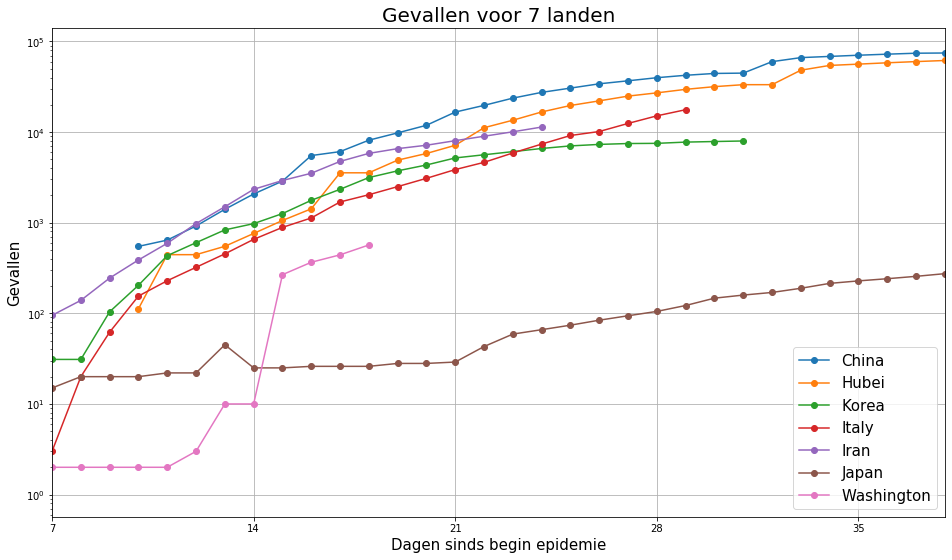

In [52]:
Countries=['China','Hubei','Korea','Italy','Iran','Japan','Washington']
CreateAlignedFigure(Countries)

Hubei
Italy
France
Germany
Spain
Switzerland
Netherlands


/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


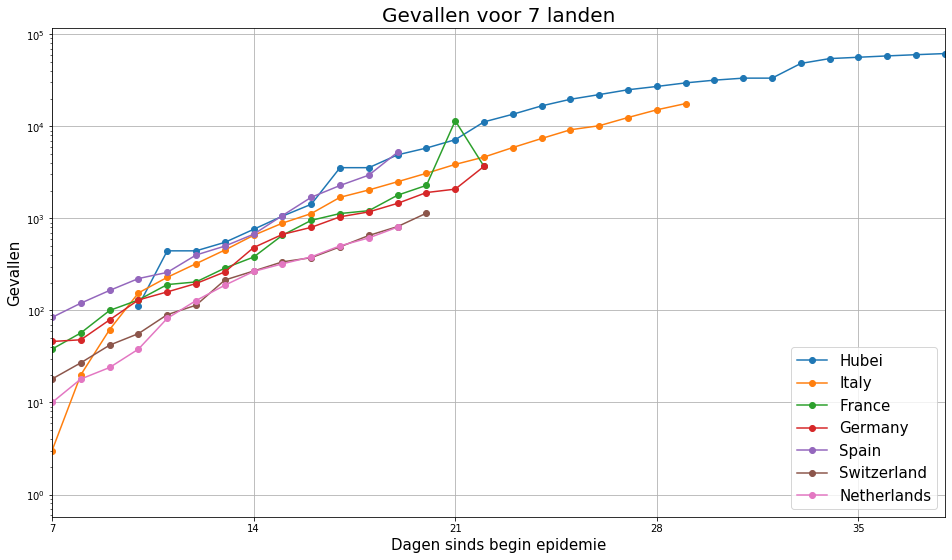

In [53]:
Countries=['Hubei','Italy','France','Germany','Spain','Switzerland','Netherlands']
CreateAlignedFigure(Countries)

## Europe minus Italy

/home/jochem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


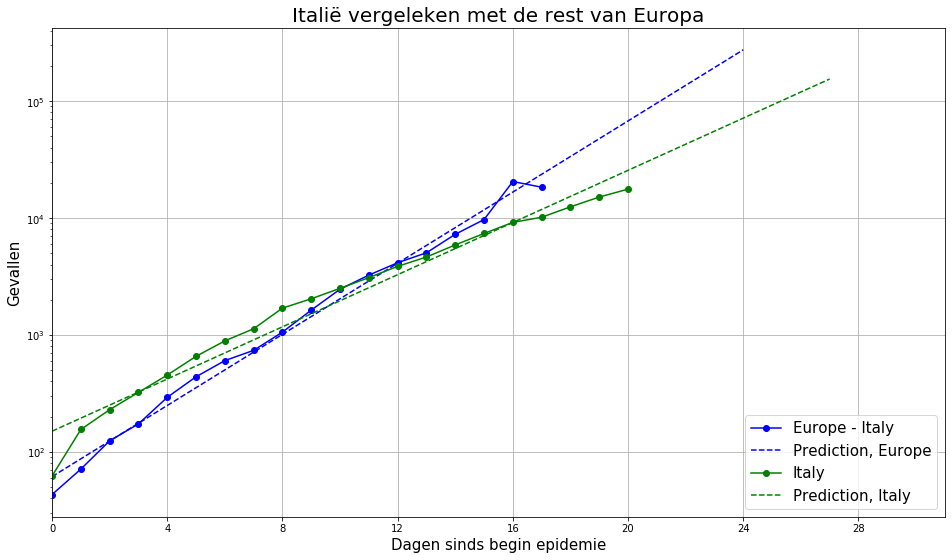

In [54]:
Threshold=40
#Create figure
fig,ax = plt.subplots(figsize=(16,9))

#Europe - Italy
valsE,allDates = GetDataFor('Europe',dataDF)
valsIt,allDatesIt = GetDataFor('Italy',dataDF)

vals = valsE-valsIt

valsCt, allDatesCt = ExpoFit(vals,allDates)
valsCt, allDatesCt = CutData(vals,allDates,Threshold)
alldaysCt = range(len(allDatesCt))

ax.plot(alldaysCt,valsCt, Color='blue',marker='o',label = 'Europe - Italy')

#Predict rest
#valsCt, allDatesCt = CutData(vals,allDates,1000)

#valsCt, allDatesCt = ExpoFit(vals,allDates)

x,y = MakePrediction(valsCt,allDatesCt,7)
x_ = range(len(x))

ax.plot(x_,y, '--',Color='blue',label = 'Prediction, Europe')

#taly
vals,allDates = GetDataFor('Italy',dataDF)

valsCt, allDatesCt = ExpoFit(vals,allDates)
valsCt, allDatesCt = CutData(vals,allDates,Threshold)
alldaysCt = range(len(allDatesCt))

ax.plot(alldaysCt,valsCt, marker='o',Color='green',label = 'Italy')

#Predict rest
#valsCt, allDatesCt = CutData(vals,allDates,1000)
x,y = MakePrediction(valsCt,allDatesCt,7)
x_ = range(len(x))

ax.plot(x_,y, '--',Color='green',label = 'Prediction, Italy')


timeline=31

ax.xaxis.set_ticks(np.arange(0, timeline, 4))
ax.set_xlim([0,timeline])    

ax.get_yaxis().get_major_formatter().labelOnlyBase = False
#set yscale
plt.yscale('log')

#labels
plt.title('Italië vergeleken met de rest van Europa'  , fontSize=20)
plt.xlabel('Dagen sinds begin epidemie',fontsize=15)
plt.ylabel('Gevallen',fontsize=15)
plt.legend(loc="lower right",fontsize=15)
plt.grid(True)
plt.show()